    Stat  Zero_Deviation_Probability (%)  Average_Deviation
0     40                            5.09           2.564045
1     41                            5.03           2.555588
2     42                            5.21           2.484374
3     43                            4.96           2.457618
4     44                            5.01           2.407976
..   ...                             ...                ...
56    96                           11.08           0.771519
57    97                           11.68           0.749730
58    98                           12.82           0.735406
59    99                           13.48           0.715190
60   100                           14.75           0.680652

[61 rows x 3 columns]


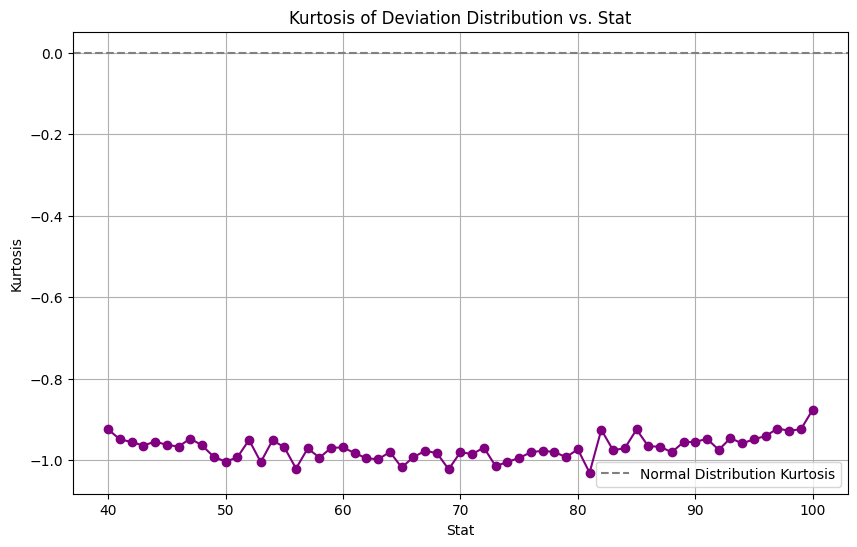

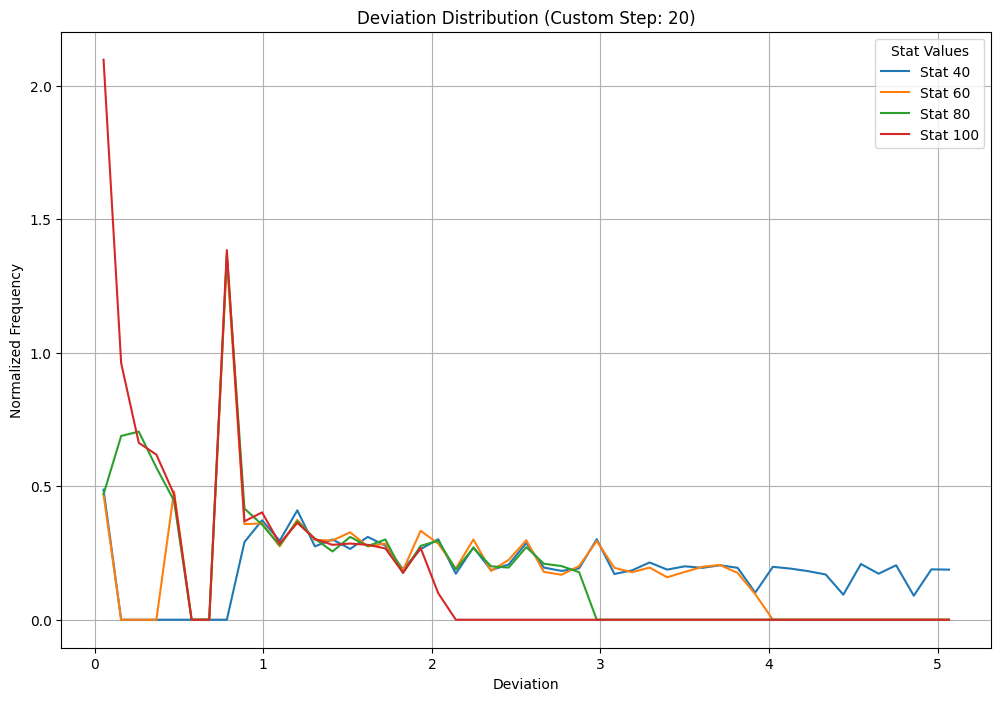

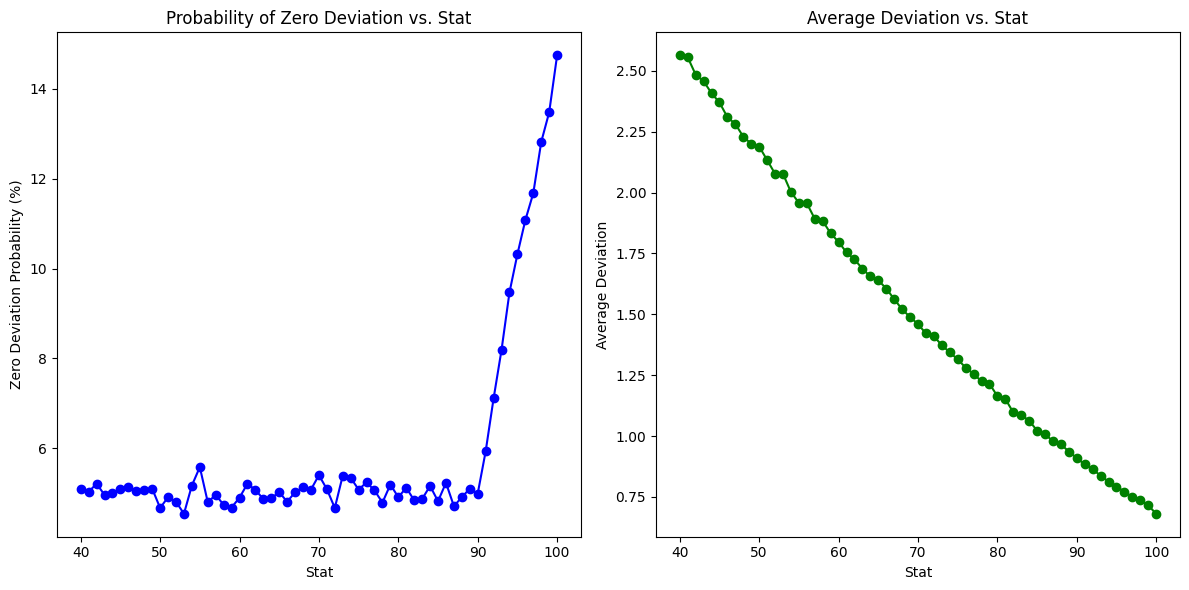

In [17]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import numpy as np

def calculate_deviation(stat, unit_random_func, is_grenade, base_gr_rotation_factor, base_launcher_rotation_factor):
    roll = unit_random_func(100) + 1  # Random roll between 1 and 100
    diff = stat - roll

    def_min_dev = 0.75
    min_deviation = 0 if diff >= 50 else def_min_dev

    rotation_factor = base_gr_rotation_factor if is_grenade else base_launcher_rotation_factor
    length_factor = 0.088

    if roll <= 5:
        deviation = 0
    else:
        deviation = max(min_deviation, ((100 - diff) ** 2) / (100 ** 2) * 2)

    deviation = 0 if deviation <= 0.05 else deviation

    return deviation, roll

def unit_random_func(max_value):
    return random.randint(0, max_value - 1)

# Simulation settings
num_simulations = 10000
first_step = 40
last_step = 101
step = 1
stat_values = range(first_step, last_step, step)  
is_grenade = True
base_gr_rotation_factor = 22.00
base_launcher_rotation_factor = 12.00

# Collect results for each stat value
results = []

detailed_results = []

for stat in stat_values:
    for _ in range(num_simulations):
        deviation, roll = calculate_deviation(stat, unit_random_func, is_grenade, base_gr_rotation_factor, base_launcher_rotation_factor)


# Create DataFrame from detailed results

for stat in stat_values:
    deviations = []
    rolls = []
    
    for _ in range(num_simulations):
        deviation, roll = calculate_deviation(stat, unit_random_func, is_grenade, base_gr_rotation_factor, base_launcher_rotation_factor)
        deviations.append(deviation)
        rolls.append(roll)
        detailed_results.append({
            'Stat': stat,
            'Roll': roll,
            'Deviation': deviation
        })
    
    zero_deviation_count = deviations.count(0)
    zero_deviation_prob = zero_deviation_count / num_simulations * 100
    avg_deviation = sum(deviations) / num_simulations

    # Store results
    results.append({
        'Stat': stat,
        'Zero_Deviation_Probability (%)': zero_deviation_prob,
        'Average_Deviation': avg_deviation
    })




# Create DataFrame from results
results_df = pd.DataFrame(results)
detailed_df = pd.DataFrame(detailed_results)

# Display the results
print(results_df)

############################################################
kurtosis_results = detailed_df.groupby('Stat')['Deviation'].apply(lambda x: kurtosis(x, fisher=True))
# Plotting kurtosis vs. stat
plt.figure(figsize=(10, 6))
plt.plot(kurtosis_results.index, kurtosis_results.values, marker='o', color='purple')
plt.title('Kurtosis of Deviation Distribution vs. Stat')
plt.xlabel('Stat')
plt.ylabel('Kurtosis')
plt.axhline(0, color='gray', linestyle='--', label='Normal Distribution Kurtosis')
plt.legend()
plt.grid(True)
plt.show()
############################################################

############################################################
# Define a custom step size for selecting stats
distribution_graph_custom_step = 20  # Change this value to control how many lines are plotted

# Filter stat values based on the custom step

custom_stat_values = list(range(first_step, last_step, distribution_graph_custom_step))

# Plotting the distribution of deviations per custom stat range
plt.figure(figsize=(12, 8))

bins = np.linspace(0, detailed_df['Deviation'].max(), 50)

for stat in custom_stat_values:
    deviations = detailed_df[detailed_df['Stat'] == stat]['Deviation']
    hist, bin_edges = np.histogram(deviations, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.plot(bin_centers, hist, label=f'Stat {stat}')

# Plot customization
plt.title(f'Deviation Distribution (Custom Step: {distribution_graph_custom_step})')
plt.xlabel('Deviation')
plt.ylabel('Normalized Frequency')
plt.legend(title='Stat Values')
plt.grid(True)
plt.show()

############################################################

############################################################
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Probability of Zero Deviation
plt.subplot(1, 2, 1)
plt.plot(results_df['Stat'], results_df['Zero_Deviation_Probability (%)'], marker='o', color='blue')
plt.title('Probability of Zero Deviation vs. Stat')
plt.xlabel('Stat')
plt.ylabel('Zero Deviation Probability (%)')

# Plot Average Deviation
plt.subplot(1, 2, 2)
plt.plot(results_df['Stat'], results_df['Average_Deviation'], marker='o', color='green')
plt.title('Average Deviation vs. Stat')
plt.xlabel('Stat')
plt.ylabel('Average Deviation')

plt.tight_layout()
plt.show()
############################################################
